In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0,random_state=42)

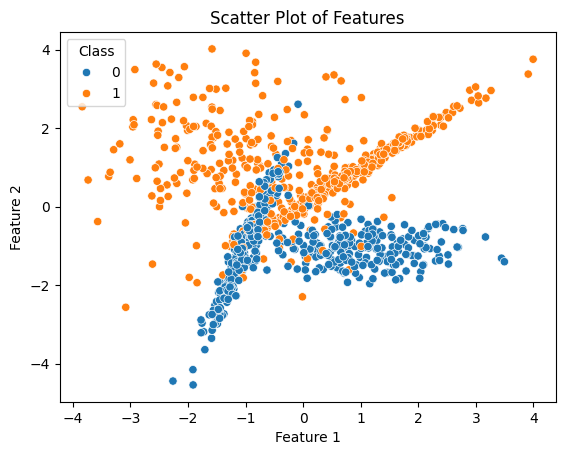

In [136]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Features")
plt.legend(title="Class")
plt.show()


In [137]:
pd.DataFrame(X)

,0,1
0,-0.999102,-0.663860
1,1.246686,1.153597
2,0.962777,0.859397
3,-2.957441,2.033645
4,1.141165,1.059449
...,...,...
995,-0.432774,0.890930
996,1.020438,1.164617
997,-0.101267,-1.590176
998,0.643761,-0.780539


In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [139]:
from sklearn.svm import SVC


In [140]:
svc=SVC(kernel='linear')

In [141]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [142]:
y_pred=svc.predict(X_test)

In [143]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       121
           1       0.89      0.86      0.87       129

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[107  14]
 [ 18 111]]


In [157]:
rbf=SVC(kernel='sigmoid')

In [158]:
rbf.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [159]:
y_pred1=rbf.predict(X_test)

In [160]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       121
           1       0.78      0.84      0.81       129

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250

[[ 90  31]
 [ 21 108]]


In [161]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [162]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [163]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [164]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [165]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       121
           1       0.97      0.89      0.93       129

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

[[118   3]
 [ 14 115]]
